In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:\Datasets\diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
train_data = data[:500]
test_data = data[500:]

In [7]:
train_data.shape

(500, 9)

In [8]:
train_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,3.808000,121.420000,68.754000,20.598000,80.616000,31.979200,0.486084,33.098000,0.36400
std,3.343875,32.441833,19.434528,15.712739,119.760418,8.203006,0.345561,11.628191,0.48163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.00000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.075000,0.252000,24.000000,0.00000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.000000,0.384000,29.000000,0.00000
75%,6.000000,142.250000,80.000000,33.000000,122.750000,36.600000,0.637750,39.250000,1.00000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.00000


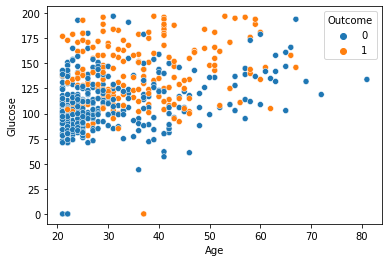

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train_data,x='Age',y='Glucose',hue = train_data['Outcome'])
plt.show()

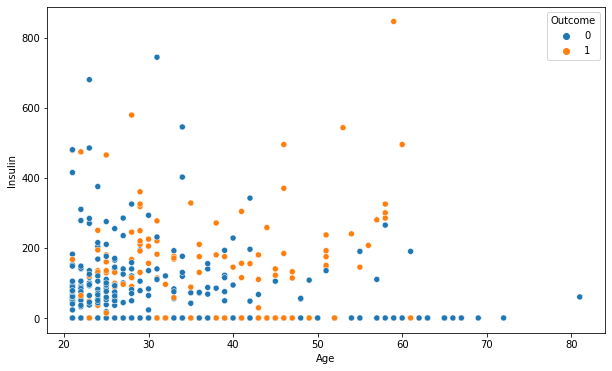

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train_data,x='Age',y='Insulin',hue = train_data['Outcome'])
plt.show()

In [74]:
cond = ((train_data['Insulin'] > 120 )& (train_data['Outcome'] == 0) & (train_data['Glucose'] > 120))
train_data.loc[cond].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.0
mean,3.225000,144.075000,70.950000,30.075000,261.300000,34.49250,0.563075,30.525000,0.0
std,2.684118,19.306419,11.705686,10.328918,151.142012,6.96292,0.417542,9.636968,0.0
min,0.000000,122.000000,48.000000,12.000000,122.000000,23.70000,0.088000,21.000000,0.0
25%,1.000000,129.000000,61.500000,22.500000,151.000000,28.77500,0.283500,24.000000,0.0
50%,2.500000,140.000000,72.000000,31.500000,209.500000,34.30000,0.481500,27.000000,0.0
75%,5.000000,154.000000,78.500000,39.500000,297.250000,38.85000,0.690000,34.000000,0.0
max,10.000000,197.000000,94.000000,50.000000,744.000000,52.30000,2.329000,61.000000,0.0


In [75]:
train_data[train_data.Outcome == 0]['Age'].describe()

count    318.000000
mean      31.283019
std       11.762708
min       21.000000
25%       23.000000
50%       27.000000
75%       37.000000
max       81.000000
Name: Age, dtype: float64

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(train_data.drop('Outcome',axis=1)),columns=list(train_data.columns)[:-1])

In [25]:
y_train = train_data.Outcome
# X_train = train_data.drop('Outcome',axis = 1)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [27]:
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()

In [28]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [29]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
rf_model.feature_importances_

array([0.07576179, 0.23456617, 0.09245238, 0.08039337, 0.08409306,
       0.17560146, 0.12333382, 0.13379795])

In [32]:
X_test = pd.DataFrame(scaler.transform(test_data.drop('Outcome',axis=1)),columns=list(train_data.columns)[:-1])
# X_test = test_data.drop('Outcome',axis=1)

In [33]:
y_pred_rf = rf_model.predict(X_test)
y_true_rf= test_data.Outcome

In [34]:
y_pred_lr = lr_model.predict(X_test)
y_true_lr= test_data.Outcome

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true_lr,y_pred_lr)

0.8097014925373134

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true_rf,y_pred_rf)

0.8059701492537313

In [41]:
from sklearn.metrics import f1_score
f1_score(y_true_lr,y_pred_lr)

0.6622516556291391

In [42]:
from sklearn.metrics import precision_score
precision_score(y_true_lr,y_pred_lr)

0.7692307692307693

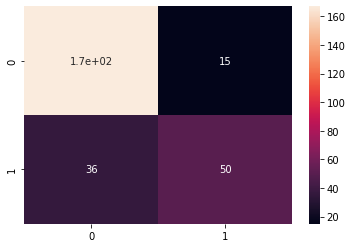

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_true_lr,y_pred_lr),annot = True)
plt.show()